Making a plot with all of the proxy stars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
proxies_names = ['kap1cet', 'tau_ceti' ,'eps_indi', '70_Oph_B'] 
proxies_files = ['kappa1_ceti','tau_ceti', 'eps_indi', '70_Oph_B'] 
names = ['$\kappa^1$\,Ceti', r'$\tau$\,Ceti', '$\epsilon$\,Indi', '70 Oph\,B']
distances = [9.2762, 3.6522, 3.6384, 5.1225]
teffs = [5709, 5356, 4641, 4475]
eeids = [0.926, 0.711, 0.471, 0.405]
seds = ['../fixed_hlsp/{}/hlsp_muscles_multi_multi_{}_broadband_v25_adapt-const-res-sed.fits'.format(filename, star) for  filename,star in zip(proxies_files[0:3], proxies_names[0:3])]
seds.append('../draft_hlsp/70_Oph_B/hlsp_muscles_multi_multi_70_oph_b_broadband_v1_adapt-const-res-sed.fits')
seds

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_382727/3233992107.py:3: SyntaxWarning: invalid escape sequence '\k'
  names = ['$\kappa^1$\,Ceti', r'$\tau$\,Ceti', '$\epsilon$\,Indi', '70 Oph\,B']
/tmp/ipykernel_382727/3233992107.py:3: SyntaxWarning: invalid escape sequence '\e'
  names = ['$\kappa^1$\,Ceti', r'$\tau$\,Ceti', '$\epsilon$\,Indi', '70 Oph\,B']
/tmp/ipykernel_382727/3233992107.py:3: SyntaxWarning: invalid escape sequence '\,'
  names = ['$\kappa^1$\,Ceti', r'$\tau$\,Ceti', '$\epsilon$\,Indi', '70 Oph\,B']


['../fixed_hlsp/kappa1_ceti/hlsp_muscles_multi_multi_kap1cet_broadband_v25_adapt-const-res-sed.fits',
 '../fixed_hlsp/tau_ceti/hlsp_muscles_multi_multi_tau_ceti_broadband_v25_adapt-const-res-sed.fits',
 '../fixed_hlsp/eps_indi/hlsp_muscles_multi_multi_eps_indi_broadband_v25_adapt-const-res-sed.fits',
 '../draft_hlsp/70_Oph_B/hlsp_muscles_multi_multi_70_oph_b_broadband_v1_adapt-const-res-sed.fits']

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\A'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_382727/3312078027.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
/tmp/ipykernel_382727/3312078027.py:18: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength (\AA)', size=25)


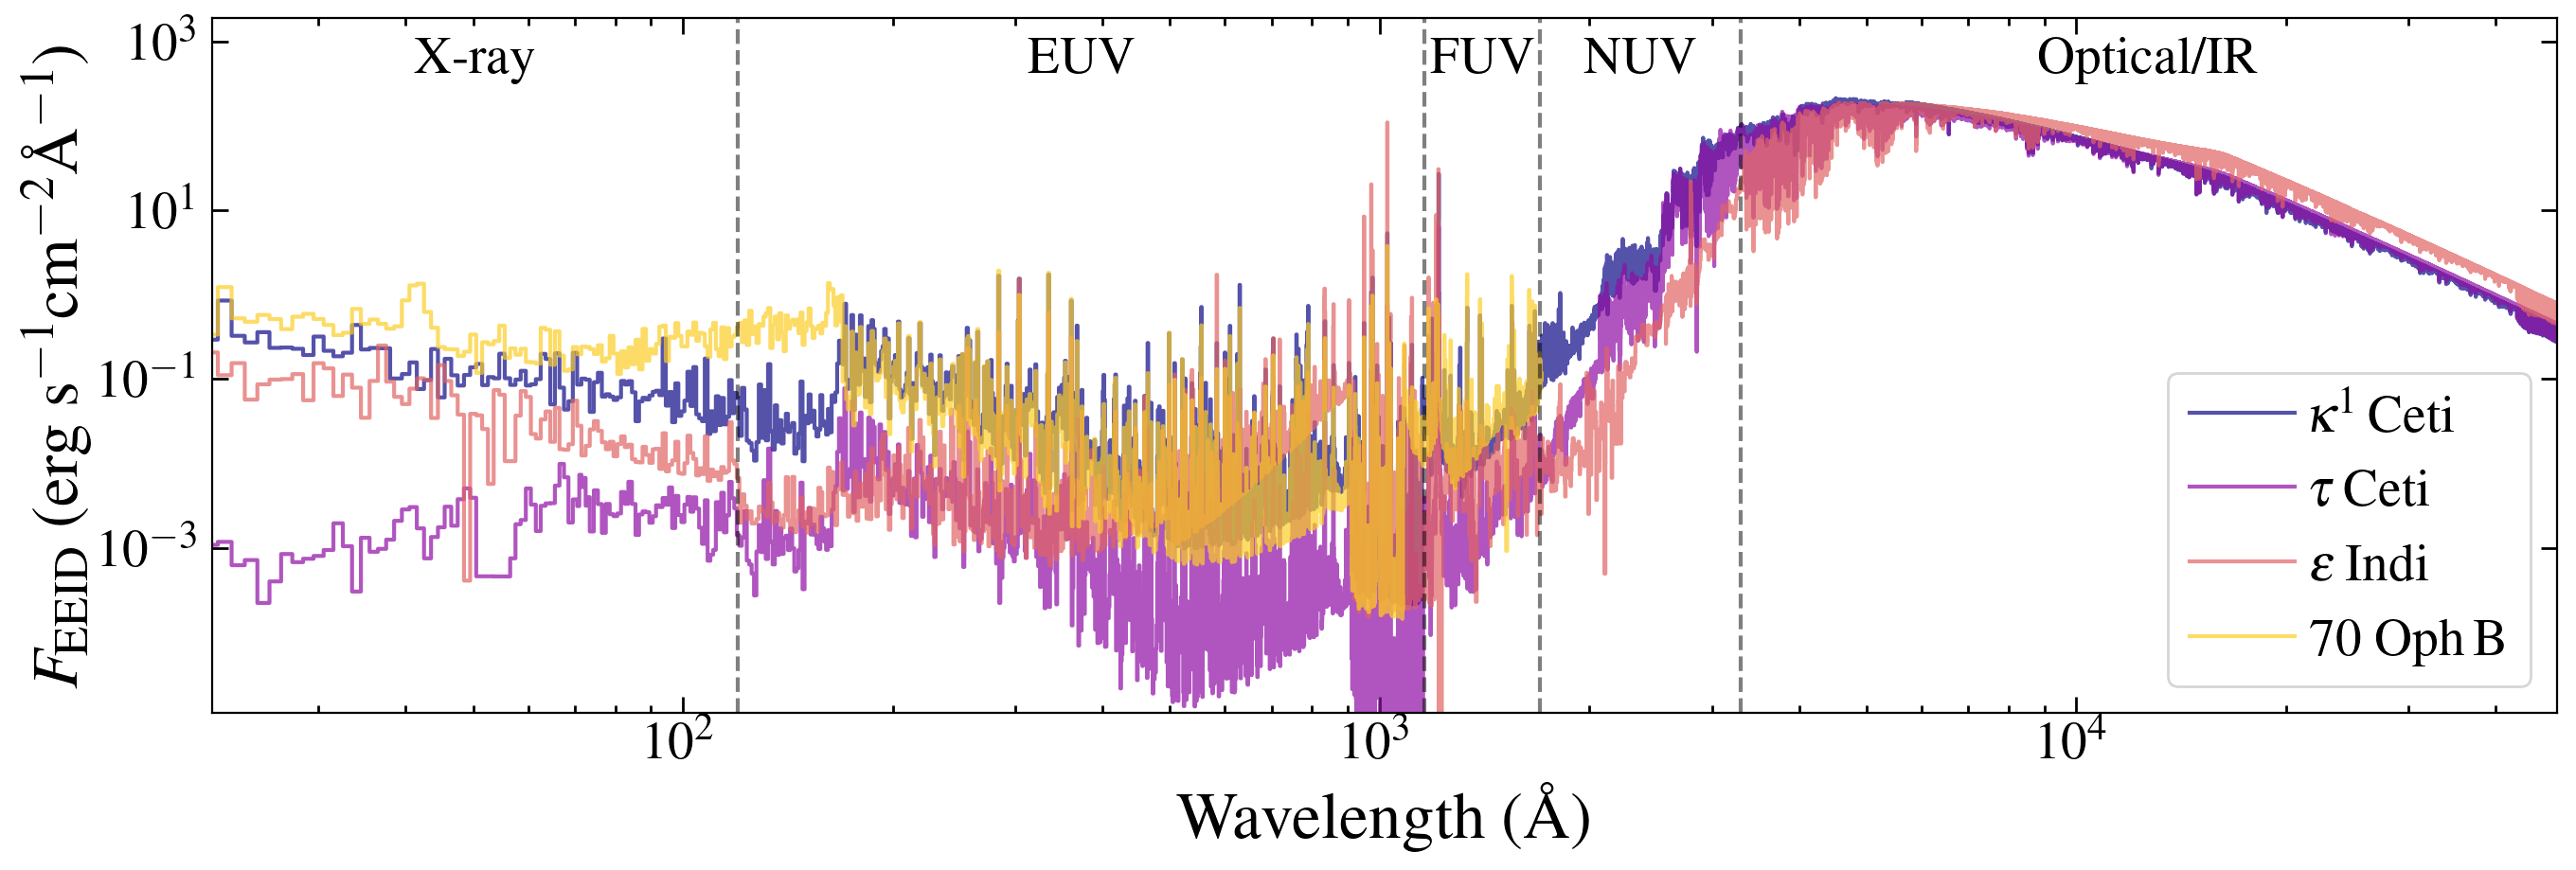

In [4]:
fig, ax = plt.subplots()

colnums = np.linspace(0, 0.9, len(proxies_names))

for i, sed in enumerate(seds):
    data = fits.getdata(sed, 1)

    scale = (distances[i]*u.pc.to(u.au) /(eeids[i]*u.au))**2
    
    w, f = data['WAVELENGTH'], data['FLUX']
    ax.step(w, f*scale, where='mid', c= plt.cm.plasma(colnums[i]), alpha=0.7, label=names[i] )

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
ax.set_xlabel('Wavelength (\AA)', size=25)

xlims = [21.1, 4.9e4]

ax.set_xlim(xlims[0], xlims[1])
ax.legend(frameon=True, loc=4)
ax.set_ylim(1.1e-5, 1.9e3)

label_y = 6e2
divlines = (120, 1160, 1700, 3300)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


labels = ['X-ray', 'EUV', 'FUV', 'NUV', 'Optical/IR']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    ax.annotate(label, (label_x, label_y), ha='center', va='center')

fig.tight_layout()
fig.savefig('../plots/hwo_stars_sed.pdf')